In [170]:
import requests
import numpy as np
import pandas as pd

from pandas import Series,DataFrame
from numpy.random import randn
from bs4 import BeautifulSoup


In [171]:
url = 'https://ucr.fbi.gov/crime-in-the-u.s/2017/crime-in-the-u.s.-2017/tables/table-20'
wiki = requests.get(url)
soup = BeautifulSoup(wiki.content, 'html.parser')

In [172]:
tables = soup.find_all('table',class_="data")

In [173]:
data= []

for row in tables:
    names = row.select('tbody tr')
    for name in names:
        data.append(name.text.strip())
    data.append(clean_names)

In [174]:
temp_data = []
final_data = []
cleaned_list = []

for item in data:
    if type(item) != list:
        new_item = item.split('\n')
        temp_data.append(new_item)

for temp in temp_data:
    cleaned_list = []
    for item in temp:
        if item != '':
            cleaned_list.append(item)
    final_data.append(cleaned_list)

In [175]:
column_names = [item.get_text() for item in tables[0].find_all('thead')]
column_clean = []
for column in column_names:
    column_clean = column.split('\n')
    column_names = []
    for item in column_clean:
        if item != '':
            column_names.append(item)
print(column_names)

['State', 'Totalmurders1', 'Totalfirearms', 'Handguns', 'Rifles', 'Shotguns', 'Firearms(typeunknown)', 'Knives orcuttinginstruments', 'Otherweapons', 'Hands, fists,feet, etc.2']


In [176]:
contents = [item.get_text() for item in tables[0].find_all('td')]

In [177]:
clean_data = []

for item in final_data:
    d = {}
    d[column_names[0]] = item[0]
    d[column_names[1]] = int(item[1].replace(',',''))
    d[column_names[2]] = int(item[2].replace(',',''))
    d[column_names[3]] = int(item[3].replace(',',''))
    d[column_names[4]] = int(item[4].replace(',',''))
    d[column_names[5]] = int(item[5].replace(',',''))
    d[column_names[6]] = int(item[6].replace(',',''))
    d[column_names[7]] = int(item[7].replace(',',''))
    d[column_names[8]] = int(item[8].replace(',',''))
    d[column_names[9]] = int(item[9].replace(',',''))
    
    clean_data.append(d)


In [178]:
df = pd.DataFrame(clean_data)
df = df[['State','Totalmurders1','Totalfirearms','Handguns','Rifles','Shotguns','Firearms(typeunknown)',
        'Knives orcuttinginstruments','Otherweapons','Hands, fists,feet, etc.2']]

In [179]:
df

,State,Totalmurders1,Totalfirearms,Handguns,Rifles,Shotguns,Firearms(typeunknown),Knives orcuttinginstruments,Otherweapons,"Hands, fists,feet, etc.2"
0,Alabama3,2,1,0,0,0,1,0,1,0
1,Alaska,62,37,7,3,3,24,13,8,4
2,Arizona,404,249,162,8,9,70,50,93,12
3,Arkansas,250,168,92,11,4,61,23,52,7
4,California,1830,1274,886,37,34,317,258,195,103
5,Colorado,218,137,88,7,4,38,37,22,22
6,Connecticut,102,72,30,0,1,41,11,9,10
7,Delaware,52,44,20,0,1,23,3,4,1
8,District of Columbia,116,90,89,0,0,1,15,5,6
9,Georgia,672,542,490,15,5,32,37,85,8


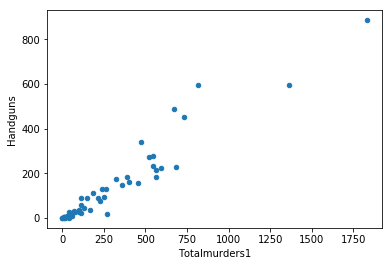

In [180]:
df.plot.scatter(x='Totalmurders1',y='Handguns')